# Загрузка библиотек

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split #, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import metrics

In [41]:
# Загрузка данных
df = pd.read_csv('/content/only0_cleand_900_data_bias.csv')

# Обработка данных

In [42]:
df.info()
df = df.drop(columns=['Unnamed: 0'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           633 non-null    int64  
 1   area/volume          633 non-null    float64
 2   Tb                   633 non-null    float64
 3   TN                   633 non-null    float64
 4   curie_temperature_k  633 non-null    float64
 5   temperature_k        633 non-null    float64
 6   h_range_max_koe      633 non-null    float64
 7   sat_em_g             633 non-null    float64
 8   coer_oe              633 non-null    float64
 9   mr (emu/g)           633 non-null    float64
 10  exc_bias_oe          633 non-null    float64
 11  ver_shift_emu_g      633 non-null    float64
 12  fc_field_t           633 non-null    float64
 13  exc_dir              633 non-null    int64  
 14  ver_s_dir            633 non-null    int64  
 15  sphericity           633 non-null    flo

In [43]:
# Разделение данных на дескрипторы (признаки) и целевое значение
features = df.drop("exc_bias_oe", axis=1).columns.to_list()
x = df.loc[:, features].values
y = df.loc[:, ["exc_bias_oe"]].values

In [44]:
# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1984)

# Нормализация дескрипторов
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Логарифмирование целевого значения
y_train = np.log10(y_train)
y_test = np.log10(y_test)

# Extratress
bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300

In [45]:
# Модель ExtraTreesRegressor
model = ExtraTreesRegressor(bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300)
model.fit(x_train, y_train)

# Предсказание
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

<ipython-input-45-d48fce31f82e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [46]:
# Метрики
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)

In [47]:
print(f"Train R2: {r2_train}")
print(f"Test R2: {r2_test}")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")

Train R2: 0.9324880325460616
Test R2: 0.6249972905429908
Train RMSE: 0.2161032664483155
Test RMSE: 0.5663085048593368
Train MAE: 0.13727403473508892
Test MAE: 0.3920547741758756


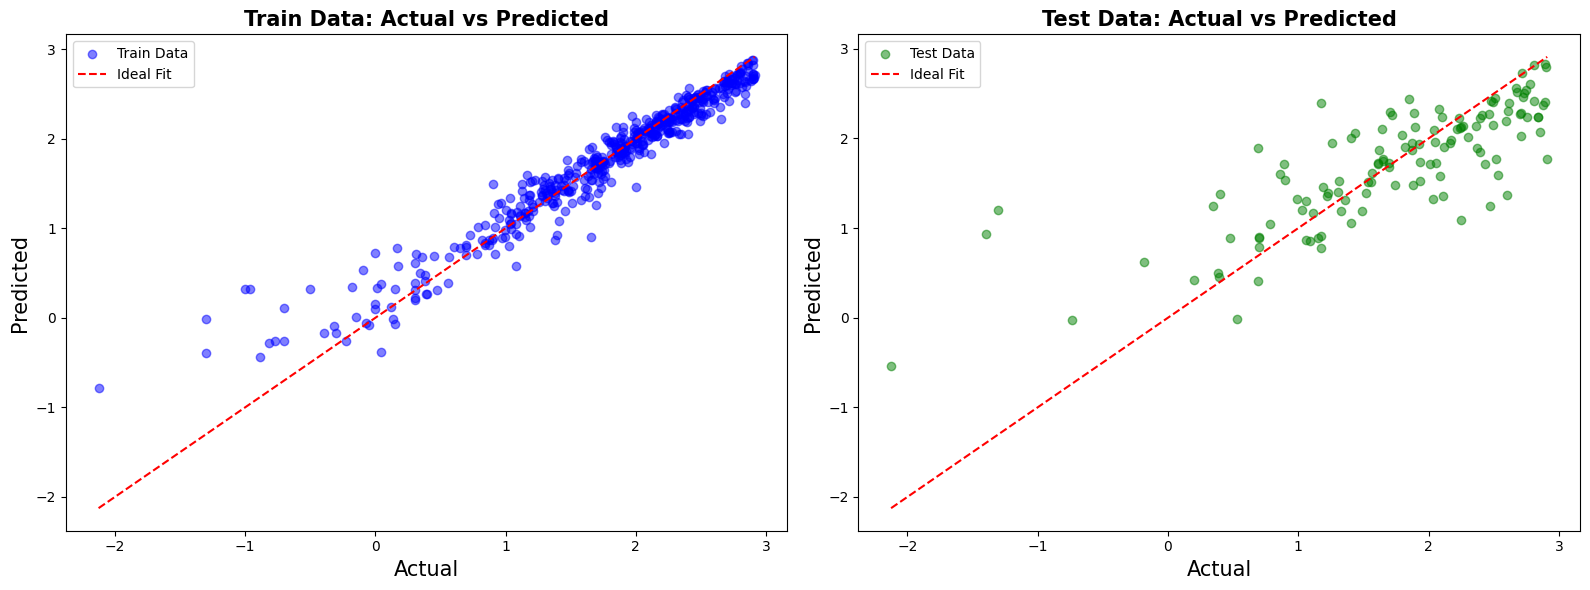

In [48]:
# Визуализация
plt.figure(figsize=[16, 6])

# Тренировочная выборка
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual', size=15)
plt.ylabel('Predicted', size=15)
plt.title('Train Data: Actual vs Predicted', fontsize=15, fontweight='bold')
plt.legend()

# Тестовая выборка
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual', size=15)
plt.ylabel('Predicted', size=15)
plt.title('Test Data: Actual vs Predicted', fontsize=15, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

# Random Forest
bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50

In [49]:
# Модель RandomForestRegressor
model = RandomForestRegressor(bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50)
model.fit(x_train, y_train)

# Предсказание
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

<ipython-input-49-d6223ec678ae>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [50]:
# Метрики
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)

In [51]:
print(f"Train R2: {r2_train}")
print(f"Test R2: {r2_test}")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")

Train R2: 0.8516162891763261
Test R2: 0.5503858695546247
Train RMSE: 0.32037901591248064
Test RMSE: 0.6200916125027357
Train MAE: 0.22176596467355794
Test MAE: 0.4296326659085427


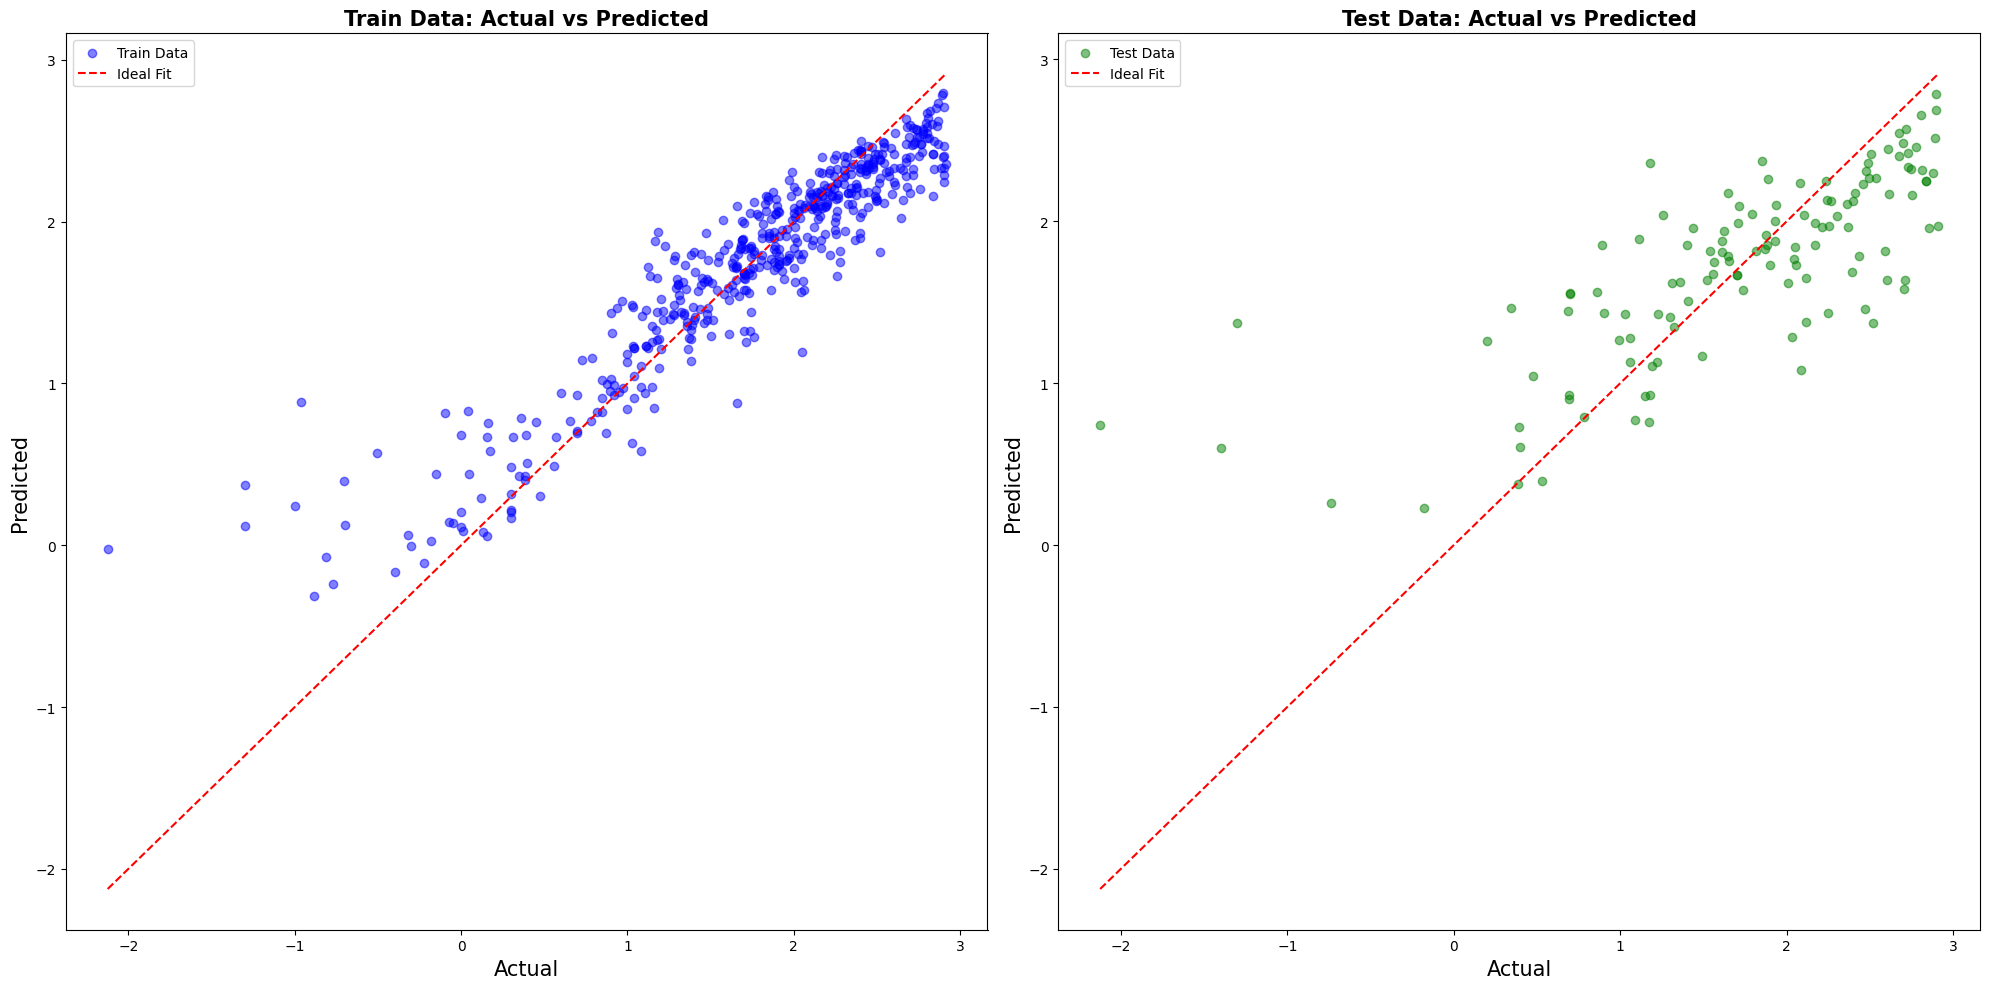

In [52]:
# Визуализация
plt.figure(figsize=[20, 10])

# Тренировочная выборка
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual', size=15)
plt.ylabel('Predicted', size=15)
plt.title('Train Data: Actual vs Predicted', fontsize=15, fontweight='bold')
plt.legend()

# Тестовая выборка
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual', size=15)
plt.ylabel('Predicted', size=15)
plt.title('Test Data: Actual vs Predicted', fontsize=15, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

# Bagging
bootstrap=False, max_features=0.5, max_samples=1.0, n_estimators=200

In [53]:
# Модель BaggingRegressor
model = BaggingRegressor(bootstrap=False, max_features=0.5, max_samples=1.0, n_estimators=200)
model.fit(x_train, y_train)

# Предсказание
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [54]:
# Метрики
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)


print(f"Train R2: {r2_train}")
print(f"Test R2: {r2_test}")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")

Train R2: 0.9973964743608276
Test R2: 0.5755912358719515
Train RMSE: 0.042437703929942054
Test RMSE: 0.6024597717750648
Train MAE: 0.0172935791894776
Test MAE: 0.41881894922693474


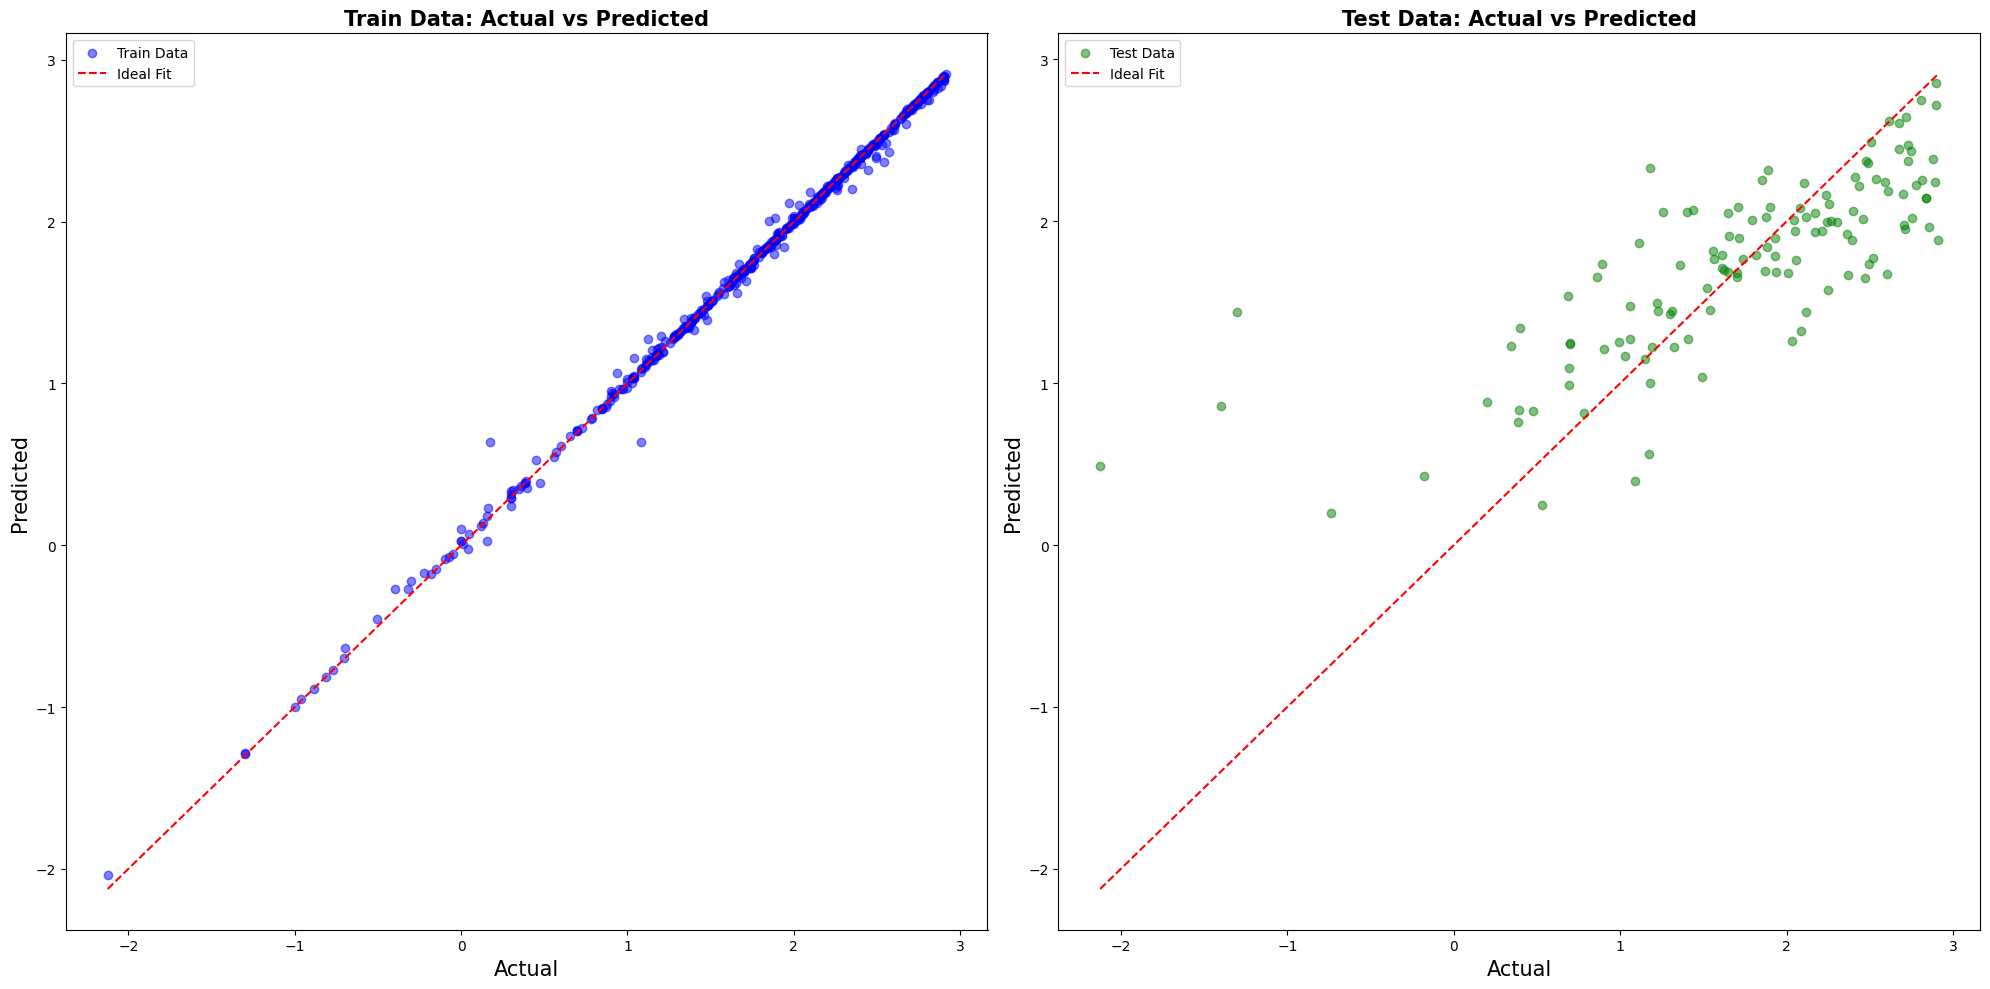

In [55]:
# Визуализация
plt.figure(figsize=[20, 10])

# Тренировочная выборка
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual', size=15)
plt.ylabel('Predicted', size=15)
plt.title('Train Data: Actual vs Predicted', fontsize=15, fontweight='bold')
plt.legend()

# Тестовая выборка
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual', size=15)
plt.ylabel('Predicted', size=15)
plt.title('Test Data: Actual vs Predicted', fontsize=15, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

# XGB
colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.5

In [56]:
# Модель XGBRegressor
model = XGBRegressor(colsample_bytree=0.5, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.5)
model.fit(x_train, y_train)

# Предсказание
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [57]:
# Метрики
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)

print(f"Train R2: {r2_train}")
print(f"Test R2: {r2_test }")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")

Train R2: 0.9954390122294291
Test R2: 0.597037406339424
Train RMSE: 0.05616947995945017
Test RMSE: 0.5870407479366727
Train MAE: 0.03761279193245816
Test MAE: 0.40886164541995346


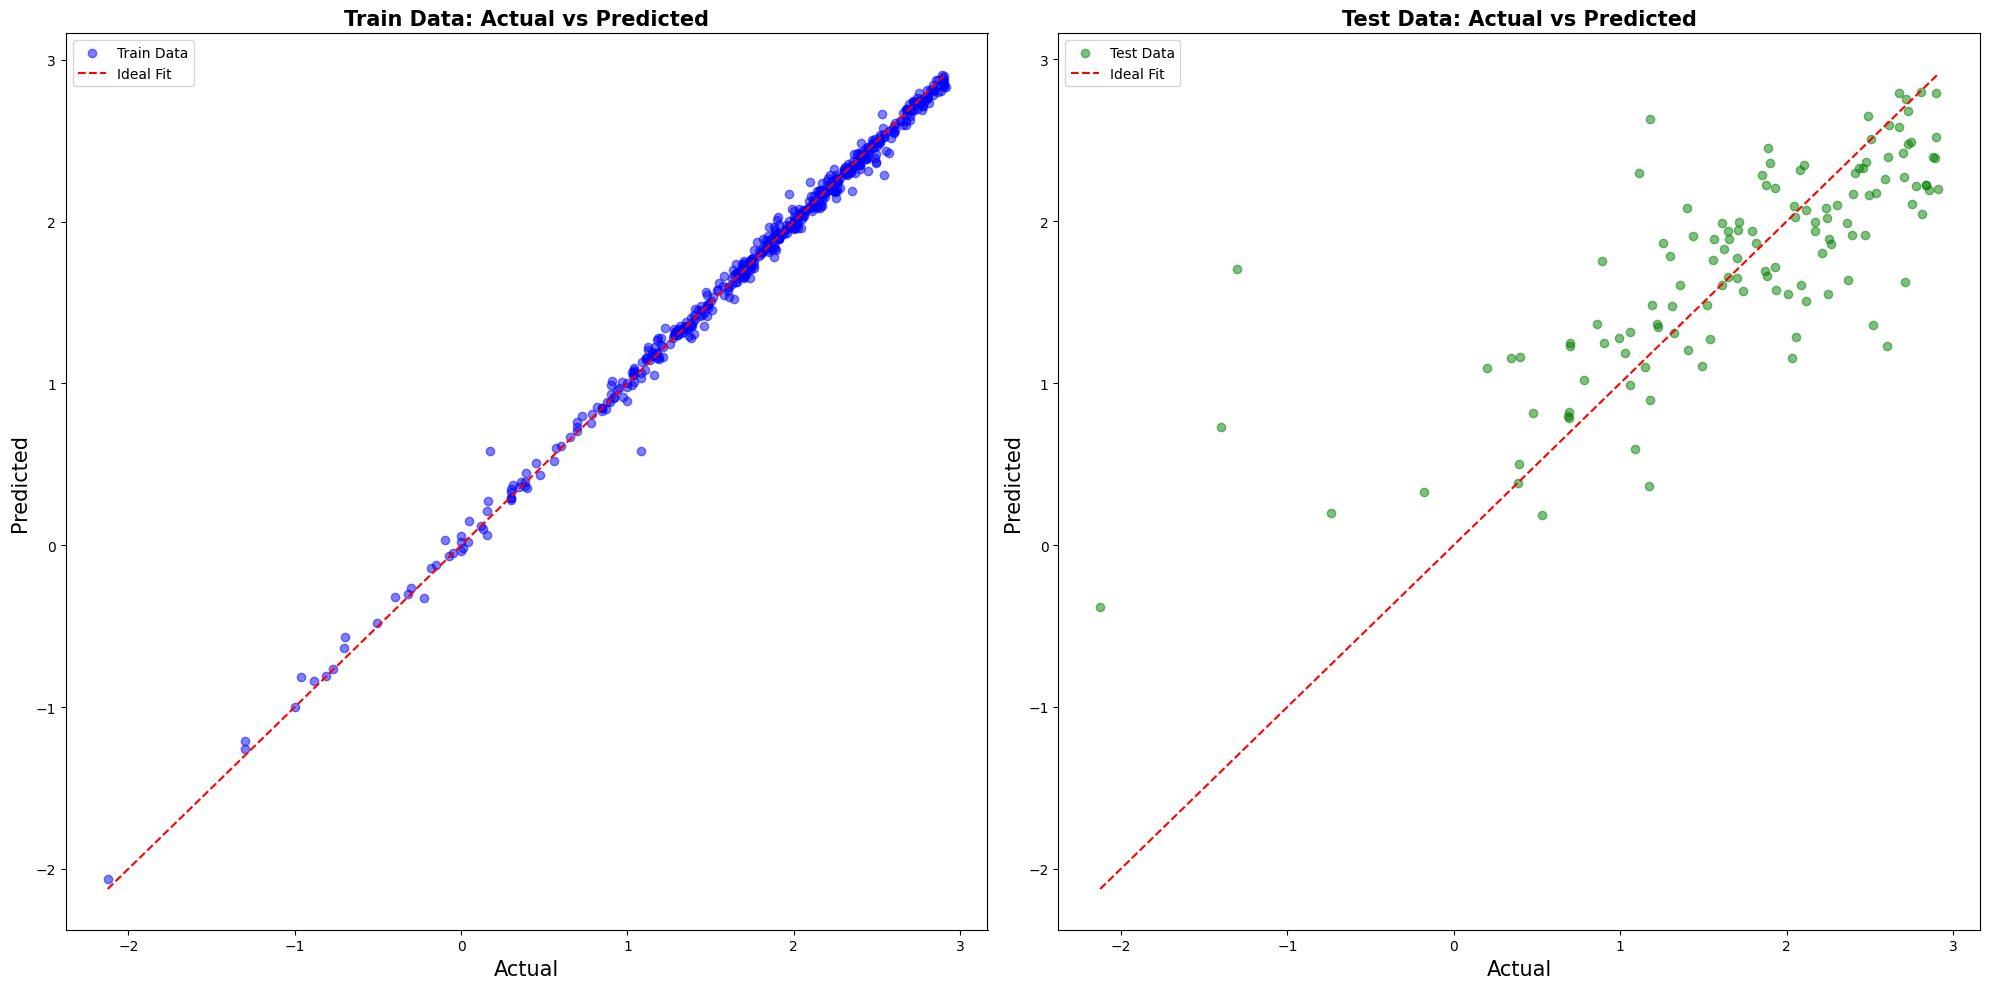

In [58]:
# Визуализация
plt.figure(figsize=[20, 10])

# Тренировочная выборка
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual', size=15)
plt.ylabel('Predicted', size=15)
plt.title('Train Data: Actual vs Predicted', fontsize=15, fontweight='bold')
plt.legend()

# Тестовая выборка
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5, label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual', size=15)
plt.ylabel('Predicted', size=15)
plt.title('Test Data: Actual vs Predicted', fontsize=15, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()